In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df_us = pd.read_csv('us.csv')

In [3]:
df_us.set_index('date', inplace = True)

In [4]:
df_us.shape

(239, 2)

In [5]:
df_us.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


<AxesSubplot:xlabel='date'>

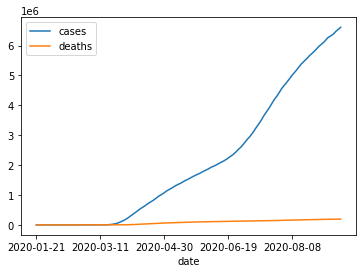

In [6]:
df_us.plot()

## Checking Stationarity

In [7]:
test = adfuller(df_us['cases'])
test_cases = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_cases)

Test Statstic                   17.382391
p-value                          1.000000
#Lags Used                       0.000000
Number of Observations Used    238.000000
dtype: float64


C:\Users\Singh\AppData\Roaming\Python\Python38\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


Data not stationary

In [8]:
test = adfuller(df_us['deaths'])
test_deaths = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_deaths)

Test Statstic                   -0.152039
p-value                          0.944002
#Lags Used                      14.000000
Number of Observations Used    224.000000
dtype: float64


Data not stationary

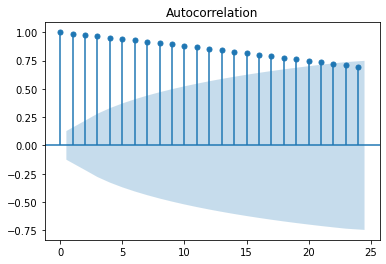

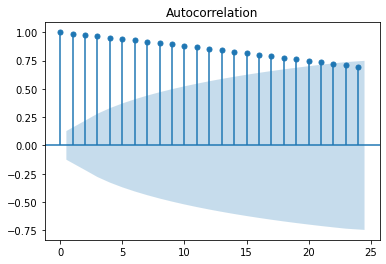

In [9]:
plot_acf(df_us['cases'], alpha = 0.05)

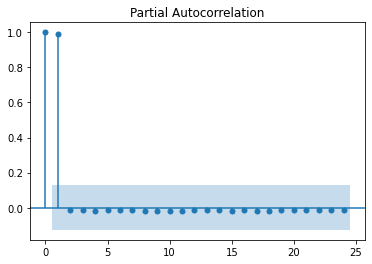

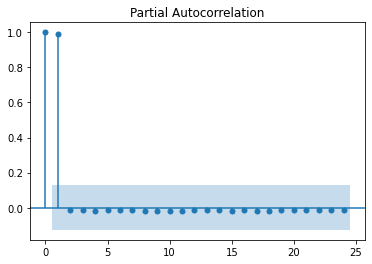

In [10]:
plot_pacf(df_us['cases'], alpha = 0.05)

## Differencing

In [11]:
df_us['cases_diff'] = df_us['cases'] - df_us['cases'].shift(1)
df_us['cases_diff_diff'] = df_us['cases_diff'] - df_us['cases_diff'].shift(1)

<AxesSubplot:xlabel='date'>

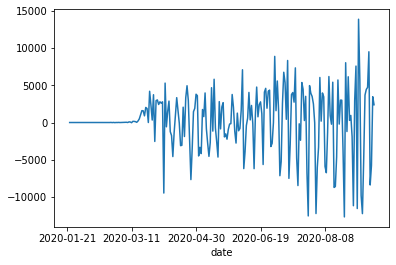

In [12]:
df_us['cases_diff_diff'].plot()

In [13]:
test = adfuller(df_us['cases_diff'].dropna())
test_cases_diff = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_cases_diff)

Test Statstic                   -1.751106
p-value                          0.404992
#Lags Used                       0.000000
Number of Observations Used    237.000000
dtype: float64


C:\Users\Singh\AppData\Roaming\Python\Python38\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [14]:
test = adfuller(df_us['cases_diff_diff'].dropna())
test_cases_diff2 = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_cases_diff2)

Test Statstic                   -2.255084
p-value                          0.186864
#Lags Used                      14.000000
Number of Observations Used    222.000000
dtype: float64


In [15]:
df_us.head()

,cases,deaths,cases_diff,cases_diff_diff
date,,,,
2020-01-21,1,0,NaN,NaN
2020-01-22,1,0,0.0,NaN
2020-01-23,1,0,0.0,0.0
2020-01-24,2,0,1.0,1.0
2020-01-25,3,0,1.0,0.0
